# Permutation + a full part of LOOCV
# Palleja & Suez genus baseline random forest permutation, using interpolated data!!!
## Using vegdist (Bray-Curtis). Both studies from NGless result and rarefied to 190!
## LHS is distance * day, not distance!!
## Time points are realgined between Suez and Palleja!!

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Jessica/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
species = pd.read_csv("/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Interpolate_missing_timepoint/Palleja_Suez_both_ngless_rarefy190_genus_baseline_vegdist_bray_interpolated_realigned_timepoint_forML.txt",
                   delimiter = "\t")

In [3]:
species.head()

,Sample_id,recovered_realigned_day,lowest_dist,DistxDay,Timepoint_realign,Study,Perturbance_scale,Shannon,Akkermansia,Alistipes,...,Phascolarctobacterium,Prevotella,Romboutsia,Roseburia,Ruminococcaceae.gen..incertae.sedis,Ruminococcus,Streptococcus,Succinivibrio,Sutterella,Veillonella
0,801,55,0.277457,15.260116,Baseline,Suez,0.528736,2.400087,0,1,...,0,12,0,3,1,6,0,14,0,0
1,802,54,0.280702,15.157895,Baseline,Suez,0.532033,2.504997,0,1,...,4,54,0,4,2,9,1,0,0,0
2,803,34,0.274286,9.325714,Baseline,Suez,0.355556,2.768342,0,0,...,0,45,0,6,2,8,1,5,1,0
3,804,40,0.239437,9.577465,Baseline,Suez,0.329577,2.719110,0,0,...,0,57,1,7,0,12,0,2,1,0
4,805,48,0.502959,24.142012,Baseline,Suez,0.794020,2.904650,0,0,...,0,26,0,1,6,6,0,3,0,0


## 2. Set up evaluation environment. Use stratified 5-fold CV to determine the accuracy of the model

In [4]:
my_data = species.drop(columns=['recovered_realigned_day', 'lowest_dist', 'Timepoint_realign', 'Study'])

In [5]:
my_data.head()

,Sample_id,DistxDay,Perturbance_scale,Shannon,Akkermansia,Alistipes,Anaerostipes,Atopobiaceae.gen..incertae.sedis,Bacteria.gen..incertae.sedis,Bacteroidales.gen..incertae.sedis,...,Phascolarctobacterium,Prevotella,Romboutsia,Roseburia,Ruminococcaceae.gen..incertae.sedis,Ruminococcus,Streptococcus,Succinivibrio,Sutterella,Veillonella
0,801,15.260116,0.528736,2.400087,0,1,0,0,0,1,...,0,12,0,3,1,6,0,14,0,0
1,802,15.157895,0.532033,2.504997,0,1,3,0,0,1,...,4,54,0,4,2,9,1,0,0,0
2,803,9.325714,0.355556,2.768342,0,0,0,1,0,0,...,0,45,0,6,2,8,1,5,1,0
3,804,9.577465,0.329577,2.719110,0,0,2,1,0,2,...,0,57,1,7,0,12,0,2,1,0
4,805,24.142012,0.794020,2.904650,0,0,2,1,5,2,...,0,26,0,1,6,6,0,3,0,0


In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [7]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [9]:
seed = 42

In [10]:
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay

In [11]:
X.head()

,Perturbance_scale,Shannon,Akkermansia,Alistipes,Anaerostipes,Atopobiaceae.gen..incertae.sedis,Bacteria.gen..incertae.sedis,Bacteroidales.gen..incertae.sedis,Bacteroides,Barnesiella,...,Phascolarctobacterium,Prevotella,Romboutsia,Roseburia,Ruminococcaceae.gen..incertae.sedis,Ruminococcus,Streptococcus,Succinivibrio,Sutterella,Veillonella
0,0.528736,2.400087,0,1,0,0,0,1,0,0,...,0,12,0,3,1,6,0,14,0,0
1,0.532033,2.504997,0,1,3,0,0,1,1,2,...,4,54,0,4,2,9,1,0,0,0
2,0.355556,2.768342,0,0,0,1,0,0,0,0,...,0,45,0,6,2,8,1,5,1,0
3,0.329577,2.719110,0,0,2,1,0,2,0,0,...,0,57,1,7,0,12,0,2,1,0
4,0.794020,2.904650,0,0,2,1,5,2,0,0,...,0,26,0,1,6,6,0,3,0,0


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5)

In [13]:
# Max_depth = 2, max_features = "log2"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators= 1050, 
                            oob_score=True, max_features = "log2")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy
output = cross_validate(RF_1, X, y, cv=kf, scoring = 'neg_mean_absolute_error', return_estimator =True)

Avg kfold neg MSE: -5.108788518666008


In [14]:
# R-squared (R2) score for the regression
result_r2 = cross_val_score(RF_1, X, y, cv=kf, scoring="r2")
avg_r2 = round(result_r2.mean(), 3)
print("Avg kfold R2 Score: {}".format(avg_r2))

Avg kfold R2 Score: -2.251


In [15]:
# Get the Spearman's rho for the training data in each cross-validation fold
# Correlating V1-V2 distance and feature baseline abundance
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
import numpy as np

seed = 42
X, y = my_data.drop(columns=['Sample_id','DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5, random_state=seed, shuffle=True)

# Specify the top 10 features 
selected_features = ['Eubacterium',
 'Lachnospiraceae.gen..incertae.sedis',
 'Prevotella',
 'Perturbance_scale',
 'Shannon',
 'Coprococcus',
 'Ruminococcaceae.gen..incertae.sedis',
 'Barnesiella',
 'Holdemanella',
 'Bifidobacterium']

# Initialize lists to store Spearman's rho values for selected features
# Initializes a dictionary where each feature in selected_features is a key, and the corresponding value is an empty list 
spearman_rho_per_feature = {feature: [] for feature in selected_features}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for feature in selected_features:
        rho, _ = spearmanr(X_train[feature], y_train)
        spearman_rho_per_feature[feature].append(rho)

# Print mean, std, and range for each selected feature
for feature in selected_features:
    mean_rho = np.mean(spearman_rho_per_feature[feature])
    std_rho = np.std(spearman_rho_per_feature[feature])
    range_str = "({:.2f}, {:.2f})".format(mean_rho - std_rho, mean_rho + std_rho)
    print("Feature: {}, Mean Spearman's rho ± std on Training Data: {:.2f} ± {:.2f} {}".format(feature, mean_rho, std_rho, range_str))

Feature: Eubacterium, Mean Spearman's rho ± std on Training Data: -0.40 ± 0.14 (-0.54, -0.26)
Feature: Lachnospiraceae.gen..incertae.sedis, Mean Spearman's rho ± std on Training Data: 0.40 ± 0.09 (0.31, 0.49)
Feature: Prevotella, Mean Spearman's rho ± std on Training Data: -0.06 ± 0.08 (-0.14, 0.01)
Feature: Perturbance_scale, Mean Spearman's rho ± std on Training Data: 0.47 ± 0.12 (0.36, 0.59)
Feature: Shannon, Mean Spearman's rho ± std on Training Data: -0.35 ± 0.08 (-0.43, -0.26)
Feature: Coprococcus, Mean Spearman's rho ± std on Training Data: -0.38 ± 0.11 (-0.49, -0.28)
Feature: Ruminococcaceae.gen..incertae.sedis, Mean Spearman's rho ± std on Training Data: 0.35 ± 0.08 (0.27, 0.42)
Feature: Barnesiella, Mean Spearman's rho ± std on Training Data: 0.12 ± 0.10 (0.02, 0.22)
Feature: Holdemanella, Mean Spearman's rho ± std on Training Data: -0.46 ± 0.16 (-0.62, -0.29)
Feature: Bifidobacterium, Mean Spearman's rho ± std on Training Data: -0.32 ± 0.11 (-0.43, -0.20)


### Correlate real Distxday and preidicted Distxday to check model performance

In [14]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import spearmanr
#from scipy.stats import pearsonr

In [15]:
# Get cross-validated predictions for each data point
y_pred = cross_val_predict(RF_1, X, y, cv=kf)

In [16]:
#y_pred

In [17]:
#y

In [18]:
# Calculate the Spearman correlation coefficient for the actual vs. predicted across all individuals
correlation, p_value = spearmanr(y, y_pred)

In [19]:
print(f"Spearman correlation coefficient for all individuals: {correlation:.3f}")
print(f"P-value for the Spearman correlation: {p_value:.3f}")

Spearman correlation coefficient for all individuals: -0.461
P-value for the Spearman correlation: 0.047


Text(9.32571428571429, 20.225465329614867, 'Spearman correlation: -0.46')

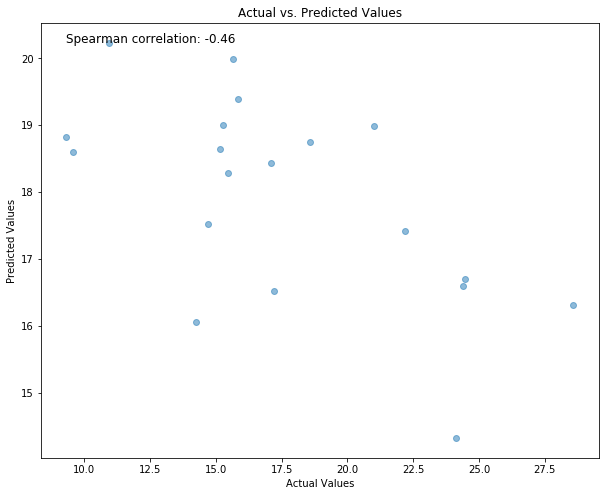

In [20]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
plt.scatter(y, y_pred, alpha=0.5)  # Plot y vs. y_pred

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Optionally, you can annotate the Spearman correlation on the plot
corr, _ = spearmanr(y, y_pred)
plt.text(min(y), max(y_pred), f'Spearman correlation: {corr:.2f}', fontsize=12)


## Step 4: Permutation
**First shuffle DistxDay against other columns, and then do random forest. Repeat this 1000 times**

In [14]:
# Permutation
from collections import OrderedDict

seed=42
kf = KFold(n_splits=5)
# Max_depth = 2, max_features = "log2", n_estimators=1050, the same setting as the one above
RF_shuffle = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators= 1050, 
                            oob_score=False, max_features = "log2")

permu_times = 1000

#Create an empty array first
#https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
permutation_negMSE=a = np.empty(shape=(permu_times,1))

for i in range(1, permu_times + 1):
        #First copy my_data using pandas.DataFrame.copy (the correct way to do this!)
        #https://moonbooks.org/Articles/How-to-copy-a-dataframe-with-pandas-in-python-/
        shuffled_data = my_data.copy()

        #Then shuffle data
        shuffled_data['DistxDay'] = shuffled_data['DistxDay'].sample(frac=1, random_state=i).reset_index(drop=True)
        
        #Then run random forest
        X_shuffle, y_shuffle = shuffled_data.drop(columns=['Sample_id','DistxDay']), shuffled_data.DistxDay
        result_negMSE_shuffle = cross_val_score(RF_shuffle, X_shuffle, y_shuffle, cv = kf, scoring="neg_mean_absolute_error")
        
        # Record the neg MSE for each permutation
        negMSE=result_negMSE_shuffle.mean() #Print average negMSE
        permutation_negMSE[i-1]=negMSE

In [15]:
len(permutation_negMSE)

1000

Text(0.5, 1.0, 'Permutation negative MSE histogram')

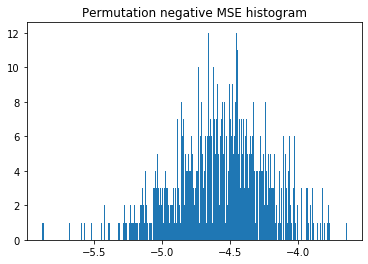

In [16]:
# Plot a histogram
binwidth=0.005
plt.hist(permutation_negMSE, bins=np.arange(min(permutation_negMSE), max(permutation_negMSE) 
                                            + binwidth, binwidth))
plt.title("Permutation negative MSE histogram") 

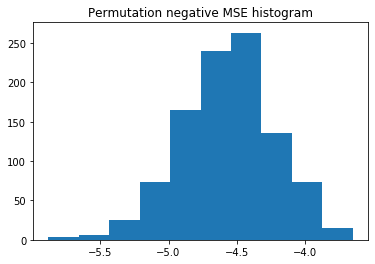

In [17]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMSE)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [18]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMSE, 95)

-4.0234490543917785

## Step 5: Random Forest (using leave-one-out cross-validation)

In [16]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

seed = 42
X, y = my_data.drop(columns=['Sample_id','DistxDay']), my_data.DistxDay

# Initialize LeaveOneOut object
loo = LeaveOneOut()

# Initialize an array of zeros to hold feature importances
# X.shape[1]: This is the number of columns (features)
# loo.get_n_splits(X): This is the number of splits in LOOCV
individual_feature_importances = np.zeros((X.shape[1], loo.get_n_splits(X)))

# Initialize an empty list to hold the negative MAE scores
neg_mae_scores_loo = []

# Initialize an array to store all LOOCV predictions (for correlation of y and y_pred later)
y_preds_array = np.zeros(len(y))

# Loop over the LOOCV folds
for fold, (train_index, test_index) in enumerate(loo.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the model with the same hyperparameters
    RF = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators=1050,
                               oob_score=True, max_features="log2")
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = RF.predict(X_test)
    y_preds_array[test_index] = y_pred
    
    # Calculate the MAE for the current fold and append it to the list
    mae = mean_absolute_error(y_test, y_pred)
    neg_mae_scores_loo.append(-mae)  # We negate the MAE to follow your requirement
    
    # Accumulate feature importances for this fold
    individual_feature_importances[:, fold] = RF.feature_importances_

# Calculate median of feature importances
median_importances = np.median(individual_feature_importances, axis=1)

# Sort the mean feature importances in descending order and get the indices
sorted_median_idx = np.argsort(median_importances)[::-1]

# Get the names of the top 10 features based on mean importance
top_10_median_feature_names = X.columns[sorted_median_idx][:10]

# Get the mean importance scores of the top 10 features
top_10_median_importances = median_importances[sorted_median_idx][:10]

# After collecting all predictions, calculate the Spearman correlation
correlation, p_value = spearmanr(y, y_preds_array)

In [17]:
# Print out the negative MAE scores for each fold
#print("Negative MAE scores for each fold: ", neg_mae_scores_loo)

# The average negative MAE score across all folds
print("Average negative MAE: ", np.mean(neg_mae_scores_loo))

Average negative MAE:  -4.52271868062485


In [18]:
individual_feature_importances.shape

(60, 19)

In [19]:
# Print the top 10 features and their importances
# Use zip because top_10_feature_names and top_10_importances are two iterables that we want to loop over simultaneously.
for name, importance in zip(top_10_median_feature_names, top_10_median_importances):
    print(f"{name}: {importance}")

Perturbance_scale: 0.060919087939054296
Eubacterium: 0.060355505804252266
Lachnospiraceae.gen..incertae.sedis: 0.05332989615769716
Prevotella: 0.04665948815231903
Shannon: 0.03858331417247382
Bifidobacterium: 0.03648024679866582
Coprococcus: 0.0333252283007333
Holdemanella: 0.030315986057618552
Ruminococcaceae.gen..incertae.sedis: 0.029762211086135058
Faecalibacterium: 0.02849339387606805


In [20]:
#Print the correlation rho and p-value
print(f"Spearman correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation: -0.037
P-value: 0.881


## Step 4: Permutation for LOOCV
**First shuffle Dist_V1V2 against other columns, and then do random forest. Repeat this 1000 times**

In [21]:
# Define the number of permutations
permu_times = 1000

# Create an empty array to store the neg MAE for each permutation
permutation_negMAE_loo = np.empty(permu_times)

# Initialize LOO cross-validation
loo = LeaveOneOut()

# Initialize the random forest with the specified settings
RF_shuffle_loo = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators=1050,
                                       oob_score=False, max_features="log2")

# Run the permutation test with LOO CV
for i in range(permu_times):
    
    # Print the value of i at every 50th iteration so that I know the progress
    # % is modulo calculation
    if i % 50 == 0:
        print(f"Current iteration: {i}")
    
    # Shuffle the 'DistxDay' column
    shuffled_target = my_data['DistxDay'].sample(frac=1, random_state=i).reset_index(drop=True)
    
    # Prepare the data for cross-validation
    X, y_shuffled = my_data.drop(columns=['Sample_id','DistxDay']), shuffled_target
    
    # Variable to accumulate the mean absolute error
    mae_sum = 0
    
    # Perform LOO cross-validation
    for train_index, test_index in loo.split(X):
        # Split the data into train and test for the current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_shuffled.iloc[train_index], y_shuffled.iloc[test_index]
        
        # Fit the model
        RF_shuffle_loo.fit(X_train, y_train)
        
        # Make predictions
        y_pred = RF_shuffle_loo.predict(X_test)
        
        # Calculate the MAE for the current fold and accumulate it
        mae_sum += mean_absolute_error(y_test, y_pred)
    
    # Calculate the average MAE over all folds and store the negative value
    permutation_negMAE_loo[i] = -mae_sum / loo.get_n_splits(X)

Current iteration: 0
Current iteration: 50
Current iteration: 100
Current iteration: 150
Current iteration: 200
Current iteration: 250
Current iteration: 300
Current iteration: 350
Current iteration: 400
Current iteration: 450
Current iteration: 500
Current iteration: 550
Current iteration: 600
Current iteration: 650
Current iteration: 700
Current iteration: 750
Current iteration: 800
Current iteration: 850
Current iteration: 900
Current iteration: 950


In [22]:
len(permutation_negMAE_loo)

1000

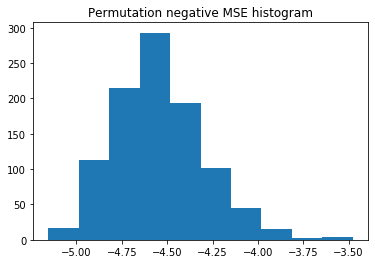

In [23]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMAE_loo)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [24]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMAE_loo, 95)

-4.11020916785005

#### See if the RF (LOOCV) is significant

In [25]:
# Calculate the mean of the negative MAE scores from the actual LOOCV
actual_neg_mae_mean = np.mean(neg_mae_scores_loo)

# Calculate the 95th percentile of the negative MAE scores from the permutation test
percentile_95_loo = np.percentile(permutation_negMAE_loo, 95)

# Compare and print the result
if actual_neg_mae_mean > percentile_95_loo: #sig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is larger than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is significant\033[0m") #bold text
else: #Nonsig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is smaller than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is nonsignificant\033[0m") #bold text

Actual neg MAE (-4.52271868062485) is smaller than 95% of the neg MAE from permutation (-4.11020916785005)
RF is nonsignificant


In [26]:
# Calculate the percentage of permutation_negMAE_loo that is less than or equal to actual_neg_mae_mean
percentage_loo = np.mean(permutation_negMAE_loo <= actual_neg_mae_mean) * 100
p_value_loo = round(1 - percentage_loo/100, 3)
print(f"The actual_neg_mae_mean is in the {p_value_loo}% percentile of the permutation distribution, so the p value is {p_value_loo}")


The actual_neg_mae_mean is in the 0.437% percentile of the permutation distribution, so the p value is 0.437
